# The Stanford POS Tagger


Web app version: http://nlp.stanford.edu:8080/parser/

Newer version of the NLTK interface, requires running a java server locally: https://github.com/nltk/nltk/wiki/Stanford-CoreNLP-API-in-NLTK


### Downloading the tagger and models

Download and uzip the model. You can do the same thing on your own computer to be able to use it locally.

In [1]:
%%time
!wget 'https://nlp.stanford.edu/software/stanford-tagger-4.2.0.zip'
!unzip './stanford-tagger-4.2.0.zip'

--2022-03-31 17:24:37--  https://nlp.stanford.edu/software/stanford-tagger-4.2.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-tagger-4.2.0.zip [following]
--2022-03-31 17:24:38--  https://downloads.cs.stanford.edu/nlp/software/stanford-tagger-4.2.0.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78034596 (74M) [application/zip]
Saving to: ‘stanford-tagger-4.2.0.zip’

stanford-tagger-4.2 100%[===================>]  74.42M  4.72MB/s    in 12s     

2022-03-31 17:24:50 (6.18 MB/s) - ‘stanford-tagger-4.2.0.zip’ saved [78034596/78034596]

Archive:  ./stanford-tagger-4.2.0.zip
   creatin

### Setting up and using the tagger with NLTK

In [2]:
model_path='./stanford-postagger-full-2020-11-17/models/english-bidirectional-distsim.tagger'
jar_tagger_path='./stanford-postagger-full-2020-11-17/stanford-postagger-4.2.0.jar'

In [3]:
from nltk.tag.stanford import StanfordPOSTagger # -- deprecated?

In [4]:
!pip freeze | grep nltk

nltk==3.2.5


In [5]:
tagger=StanfordPOSTagger(model_path, jar_tagger_path)

/usr/local/lib/python3.7/dist-packages/nltk/tag/stanford.py:149: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordPOSTagger, self).__init__(*args, **kwargs)


In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
tagger.tag(nltk.word_tokenize("I am eating a lot of candy."))

[('I', 'PRP'),
 ('am', 'VBP'),
 ('eating', 'VBG'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('candy', 'NN'),
 ('.', '.')]

In [8]:
tagger.tag(nltk.word_tokenize("Time flies like an arrow."))

[('Time', 'NNP'),
 ('flies', 'VBZ'),
 ('like', 'IN'),
 ('an', 'DT'),
 ('arrow', 'NN'),
 ('.', '.')]

In [9]:
tagger.tag(nltk.word_tokenize("Fruit flies like a banana."))

[('Fruit', 'NNP'),
 ('flies', 'VBZ'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('banana', 'NN'),
 ('.', '.')]

In [10]:
tagger.tag(nltk.word_tokenize("I don't like fruit flies like a banana."))

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('fruit', 'NN'),
 ('flies', 'NNS'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('banana', 'NN'),
 ('.', '.')]

In [11]:
tagger.tag(nltk.word_tokenize("I am eating a lot of candy."))

[('I', 'PRP'),
 ('am', 'VBP'),
 ('eating', 'VBG'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('candy', 'NN'),
 ('.', '.')]

In [12]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
tagger.tag([st.stem(t) 
      for t in nltk.word_tokenize("I am eating a lot of candy.")])

[('I', 'PRP'),
 ('am', 'VBP'),
 ('eat', 'VB'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('candi', 'NN'),
 ('.', '.')]

### Using averaged_perceptron_tagger in NLTK

In [13]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
nltk.pos_tag(nltk.word_tokenize("I am eating a lot of candy."))

[('I', 'PRP'),
 ('am', 'VBP'),
 ('eating', 'VBG'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('candy', 'NN'),
 ('.', '.')]

In [15]:
nltk.pos_tag(nltk.word_tokenize("Time flies like an arrow."))

[('Time', 'NNP'),
 ('flies', 'NNS'),
 ('like', 'IN'),
 ('an', 'DT'),
 ('arrow', 'NN'),
 ('.', '.')]

In [16]:
nltk.pos_tag(nltk.word_tokenize("Fruit flies like a banana."))

[('Fruit', 'NNP'),
 ('flies', 'VBZ'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('banana', 'NN'),
 ('.', '.')]

Understanding the tags

In [17]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [18]:
nltk.help.upenn_tagset('NNP')
print()
nltk.help.upenn_tagset()

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    ther

# Syntactic Parsing

### Stanford Parser

You can try the usage below locally: (needs java)

In [19]:
!wget 'https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip'
!unzip 'stanford-parser-4.2.0.zip'

--2022-03-31 17:25:14--  https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-parser-4.2.0.zip [following]
--2022-03-31 17:25:14--  https://downloads.cs.stanford.edu/nlp/software/stanford-parser-4.2.0.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182285548 (174M) [application/zip]
Saving to: ‘stanford-parser-4.2.0.zip’

stanford-parser-4.2 100%[===================>] 173.84M  4.95MB/s    in 32s     

2022-03-31 17:25:47 (5.36 MB/s) - ‘stanford-parser-4.2.0.zip’ saved [182285548/182285548]

Archive:  stanford-parser-4.2.0.zip
   creat

In [20]:
# !wget 'https://nlp.stanford.edu/software/stanford-corenlp-4.2.0-models-english.jar'

In [21]:
import os
from nltk.parse.stanford import StanfordParser

In [22]:
os.environ['JAVAHOME'] = "/usr/bin/java"
os.environ['STANFORD_PARSER'] = '/content/stanford-parser-full-2020-11-17/stanford-parser.jar'
os.environ['STANFORD_MODELS'] = '/content/stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar'

In [23]:
parser = StanfordParser(model_path="/content/stanford-corenlp-4.2.0-models-english.jar")
propozitii = parser.raw_parse_sents(("I like to go to school.", "The cat is running through the room.","Where are you?"))
for prop in propozitii:
    print(list(prop))

[main] ERROR edu.stanford.nlp.parser.lexparser.LexicalizedParser - java.io.IOException: Unable to open "/content/stanford-corenlp-4.2.0-models-english.jar" as class path, filename or URL
  edu.stanford.nlp.io.IOUtils.getInputStreamFromURLOrClasspathOrFileSystem(IOUtils.java:501)
  edu.stanford.nlp.io.IOUtils.readStreamFromString(IOUtils.java:402)
  edu.stanford.nlp.parser.lexparser.LexicalizedParser.getParserFromSerializedFile(LexicalizedParser.java:567)
  edu.stanford.nlp.parser.lexparser.LexicalizedParser.getParserFromFile(LexicalizedParser.java:373)
  edu.stanford.nlp.parser.lexparser.LexicalizedParser.loadModel(LexicalizedParser.java:183)
  edu.stanford.nlp.parser.lexparser.LexicalizedParser.main(LexicalizedParser.java:1373)
java.io.IOException: Unable to open "/content/stanford-corenlp-4.2.0-models-english.jar" as class path, filename or URL
	at edu.stanford.nlp.io.IOUtils.getInputStreamFromURLOrClasspathOrFileSystem(IOUtils.java:501)
	at edu.stanford.nlp.io.IOUtils.readerFromStri

OSError: ignored

### Alternatively


In [24]:
!wget 'https://nlp.stanford.edu/software/stanford-corenlp-latest.zip'
!unzip 'stanford-corenlp-latest.zip'

--2022-03-31 17:26:06--  https://nlp.stanford.edu/software/stanford-corenlp-latest.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-latest.zip [following]
--2022-03-31 17:26:07--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-latest.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 505207915 (482M) [application/zip]
Saving to: ‘stanford-corenlp-latest.zip’

stanford-corenlp-la 100%[===================>] 481.80M  5.11MB/s    in 92s     

2022-03-31 17:27:39 (5.22 MB/s) - ‘stanford-corenlp-latest.zip’ saved [505207915/505207915]

Archive:  stanford-corenlp-latest.

In [25]:
!pip install stanfordcorenlp

In [26]:
import stanfordcorenlp
sc = stanfordcorenlp.StanfordCoreNLP('/content/stanford-corenlp-4.4.0')

Dependency parsing

In [27]:
text = "I eat a lot of candy."
dependencies = sc.dependency_parse(text)
dependencies

[('ROOT', 0, 2),
 ('nsubj', 2, 1),
 ('det', 4, 3),
 ('obj', 2, 4),
 ('case', 6, 5),
 ('nmod', 4, 6),
 ('punct', 2, 7)]

In [28]:
tokens = nltk.word_tokenize(text)
for (t, w1, w2) in dependencies:
  if w1 < len(tokens) and w2 < len(tokens):
    print("%s --> %s (%s)" % (
        tokens[w2-1] if w2>0 else "", 
        tokens[w1-1] if w1>0 else "",
         t))

eat -->  (ROOT)
I --> eat (nsubj)
a --> lot (det)
lot --> eat (obj)
of --> candy (case)
candy --> lot (nmod)


Descriptions of dependency relations: https://universaldependencies.org/u/dep/

Demo: https://nlp.stanford.edu/software/stanford-dependencies.html


Constituent parsing

In [29]:
parsed = sc.parse(text)
print(parsed)

(ROOT
  (S
    (NP (PRP I))
    (VP (VBP eat)
      (NP
        (NP (DT a) (NN lot))
        (PP (IN of)
          (NP (NN candy)))))
    (. .)))


# Tagged corpora

In [30]:
nltk.download('brown')
nltk.corpus.brown.tagged_words()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [31]:
list(nltk.corpus.brown.tagged_sents(categories='news'))[:2]

[[('The', 'AT'),
  ('Fulton', 'NP-TL'),
  ('County', 'NN-TL'),
  ('Grand', 'JJ-TL'),
  ('Jury', 'NN-TL'),
  ('said', 'VBD'),
  ('Friday', 'NR'),
  ('an', 'AT'),
  ('investigation', 'NN'),
  ('of', 'IN'),
  ("Atlanta's", 'NP$'),
  ('recent', 'JJ'),
  ('primary', 'NN'),
  ('election', 'NN'),
  ('produced', 'VBD'),
  ('``', '``'),
  ('no', 'AT'),
  ('evidence', 'NN'),
  ("''", "''"),
  ('that', 'CS'),
  ('any', 'DTI'),
  ('irregularities', 'NNS'),
  ('took', 'VBD'),
  ('place', 'NN'),
  ('.', '.')],
 [('The', 'AT'),
  ('jury', 'NN'),
  ('further', 'RBR'),
  ('said', 'VBD'),
  ('in', 'IN'),
  ('term-end', 'NN'),
  ('presentments', 'NNS'),
  ('that', 'CS'),
  ('the', 'AT'),
  ('City', 'NN-TL'),
  ('Executive', 'JJ-TL'),
  ('Committee', 'NN-TL'),
  (',', ','),
  ('which', 'WDT'),
  ('had', 'HVD'),
  ('over-all', 'JJ'),
  ('charge', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('election', 'NN'),
  (',', ','),
  ('``', '``'),
  ('deserves', 'VBZ'),
  ('the', 'AT'),
  ('praise', 'NN'),
  ('and', 

## Penn Treebank Corpus

References:

Paper with Penn Treebank description: https://www.researchgate.net/publication/2873803_The_Penn_Treebank_An_overview

List of explanations for tag acronyms: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html


In [32]:
nltk.download('treebank')
len(list(nltk.corpus.treebank.tagged_words()))

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


100676

In [33]:
nltk.corpus.treebank.tagged_words()[:10]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT')]

Other tools, POS Tagging performance & comparison: https://aclweb.org/aclwiki/index.php?title=POS_Tagging_(State_of_the_art)

### Parsing with given grammar

https://www.nltk.org/book/ch08.html

In [34]:
import nltk
gram = nltk.CFG.fromstring("""  
S -> NP VP | TO VB
VP -> V NP | V NP PP | V S | V PP
PP -> P NP  
V -> "caught" | "ate" | "likes" | "like" | "chase" | "go" | "fly" | "flies" | "eat" | "saw"
NP -> Det N | Det N PP | PRP
Det -> "the" | "a" | "an" | "my" | "some" | "The"
N -> "mice" | "cat" | "dog" |  "school" | "Time" | "arrow" | "fly" | "flies" | "candy" | "man" | "park"
P -> "in" | "to" | "on"
TO -> "to"
PRP -> "I"  """)


In [35]:
import nltk
gram = nltk.CFG.fromstring("""  
S -> NP VP | TO VB
VP -> V NP | V NP PP| V S | V PP
PP -> P NP  
V -> "caught" | "ate" | "likes" | "like" | "chase" | "go" | "fly" | "flies" | "eat" | "saw"
NP -> Det N | Det N PP | PRP
Det -> "the" | "a" | "an" | "my" | "some" | "The"
N -> "mice" | "cat" | "dog" |  "school" | "Time" | "arrow" | "fly" | "flies" | "candy" | "man" | "park"
P -> "in" | "to" | "on"
TO -> "to"
PRP -> "I"  """)


In [36]:
rdp = nltk.RecursiveDescentParser(gram)
rdp

In [37]:
text = "I eat some candy"
for tree in rdp.parse(nltk.word_tokenize(text)):
    print(tree)

(S (NP (PRP I)) (VP (V eat) (NP (Det some) (N candy))))


Syntactic ambiguity:

In [38]:
text = "The dog saw a man in the park"
for tree in rdp.parse(nltk.word_tokenize(text)):
    print(tree)

(S
  (NP (Det The) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))
(S
  (NP (Det The) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man))
    (PP (P in) (NP (Det the) (N park)))))


In [39]:
from nltk.draw.tree import draw_trees

In [ ]:
for tree in rdp.parse(nltk.word_tokenize(text)):
    draw_trees(tree)  # run locally

In [41]:
srp = nltk.ShiftReduceParser(gram, trace=2)

In [42]:
text = "I like my candy"
for tree in srp.parse(nltk.word_tokenize(text)):
    print(tree)

Parsing 'I like my candy'
    [ * I like my candy]
  S [ 'I' * like my candy]
  R [ PRP * like my candy]
  R [ NP * like my candy]
  S [ NP 'like' * my candy]
  R [ NP V * my candy]
  S [ NP V 'my' * candy]
  R [ NP V Det * candy]
  S [ NP V Det 'candy' * ]
  R [ NP V Det N * ]
  R [ NP V NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP (PRP I)) (VP (V like) (NP (Det my) (N candy))))


In [43]:
groucho_grammar = nltk.CFG.fromstring("""
 S -> NP VP
 PP -> P NP
 NP -> Det N | Det N PP | 'I'
 VP -> V NP | VP PP
 Det -> 'an' | 'my'
 N -> 'elephant' | 'pajamas'
 V -> 'shot'
 P -> 'in'
 """)


In [44]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
  print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [45]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ShiftReduceParser(groucho_grammar)
for tree in parser.parse(sent):
  print(tree)

# Exercitii (1p total)

1. Completati functia scrisa in laboratorul anterior cu POS-tagging: in final veti avea o functie care sa primeasca un text si sa faca toata preprocesarea (tokenizare, lematizare, normalizare) si pos-tagging, si sa intoarca textul cu tags pe cuvinte.

/

Add to the function implemented for the past lab instructions for POS-tagging: in the end you should have a function which receives an input text and performs preprocessing from beginning to end (tokenization, lemmatization, normalization) as well as POS-tagging, then returns the tagged text. 

In [46]:
import string
import unicodedata
from collections import Counter

import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('universal_tagset')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [47]:
stemmer = PorterStemmer()
lemmatizaer = WordNetLemmatizer()

In [48]:
sentence = "This sentence is used for testing different preprocessing steps in NLP!!!"

In [49]:
def preprocess(text, remove_punctuation=False, remove_stopwords=False, stemming=False, lemmatization=True):
  preprocessed_text = text
  # lowercasing
  preprocessed_text = preprocessed_text.lower()
  # normalize text
  preprocessed_text = unicodedata.normalize('NFKD', preprocessed_text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  # tokenize words
  tokens = nltk.word_tokenize(preprocessed_text)
  # punctuation mark removal
  if remove_punctuation:
    tokens = [token for token in tokens if token.isalnum()]
  # stopwords removal
  if remove_stopwords:
    tokens = [token for token in tokens if token not in stopwords.words("english")]
  # stemming (normalizing technique)
  if stemming:
    tokens = [stemmer.stem(token) for token in tokens]
  # lemmatization - reducing words to their root
  if lemmatization:
    tokens = [lemmatizaer.lemmatize(token) for token in tokens]

  pos_tags = nltk.pos_tag(tokens, tagset='universal')

  return pos_tags

In [50]:
print("Preprocessed text: \n", preprocess(sentence))
print("Original text: \n", sentence)

Preprocessed text: 
 [('this', 'DET'), ('sentence', 'NOUN'), ('is', 'VERB'), ('used', 'VERB'), ('for', 'ADP'), ('testing', 'VERB'), ('different', 'ADJ'), ('preprocessing', 'VERB'), ('step', 'NOUN'), ('in', 'ADP'), ('nlp', 'NOUN'), ('!', '.'), ('!', '.'), ('!', '.')]
Original text: 
 This sentence is used for testing different preprocessing steps in NLP!!!


2. Aplicati functia pe un fragment de cateva sute de cuvinte din stiri din ultimele cateva zile (aveti grija sa fie intr-o limba pe care functia o suporta). Afisati distributia partilor de vorbire intr-un grafic.

/

Execute your function on a piece of news from the past days of at least a few hundred words (make sure it's in a language that the function supports). Illustrate the distribution of POSs in a graph. 

In [51]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [52]:
with open('/content/drive/MyDrive/test.txt') as f:
    text = f.read()
    print(text)

The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing global pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The novel virus was first identified from an outbreak in the Chinese city of Wuhan in December 2019, and attempts to contain it there failed, allowing it to spread across the globe. The World Health Organization (WHO) declared a Public Health Emergency of International Concern on 30 January 2020 and a pandemic on 11 March 2020. As of 23 March 2022, the pandemic had caused more than 474 million cases and 6.1 million deaths, making it one of the deadliest in history.

COVID-19 symptoms range from undetectable to deadly, but most commonly include fever, dry cough, and fatigue. Severe illness is more likely in elderly patients and those with certain underlying medical conditions. COVID‑19 transmits when people breathe in air contaminated by droplets and small airborne particles containing 

In [53]:
text_preprocessed = preprocess(text)
print('Preprocessing step + POS-tagging: \n', text_preprocessed)

Preprocessing step + POS-tagging: 
 [('the', 'DET'), ('covid-19', 'ADJ'), ('pandemic', 'NOUN'), (',', '.'), ('also', 'ADV'), ('known', 'VERB'), ('a', 'DET'), ('the', 'DET'), ('coronavirus', 'NOUN'), ('pandemic', 'NOUN'), (',', '.'), ('is', 'VERB'), ('an', 'DET'), ('ongoing', 'ADJ'), ('global', 'ADJ'), ('pandemic', 'NOUN'), ('of', 'ADP'), ('coronavirus', 'NOUN'), ('disease', 'NOUN'), ('2019', 'NUM'), ('(', '.'), ('covid-19', 'NOUN'), (')', '.'), ('caused', 'VERB'), ('by', 'ADP'), ('severe', 'ADJ'), ('acute', 'ADJ'), ('respiratory', 'NOUN'), ('syndrome', 'NOUN'), ('coronavirus', 'NOUN'), ('2', 'NUM'), ('(', '.'), ('sars-cov-2', 'NOUN'), (')', '.'), ('.', '.'), ('the', 'DET'), ('novel', 'ADJ'), ('virus', 'NOUN'), ('wa', 'NOUN'), ('first', 'ADV'), ('identified', 'VERB'), ('from', 'ADP'), ('an', 'DET'), ('outbreak', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('chinese', 'ADJ'), ('city', 'NOUN'), ('of', 'ADP'), ('wuhan', 'NOUN'), ('in', 'ADP'), ('december', 'NOUN'), ('2019', 'NUM'), (',', '.'),

In [54]:
def get_pos_tags(tagged_text):
  pos_tags_count = Counter([j for _, j in tagged_text])
  return pos_tags_count

count_pos_tags = get_pos_tags(text_preprocessed)
print(count_pos_tags)

Counter({'NOUN': 119, 'ADJ': 72, 'VERB': 69, '.': 62, 'ADP': 39, 'CONJ': 32, 'DET': 30, 'NUM': 20, 'ADV': 18, 'PRON': 7, 'PRT': 3})


In [55]:
pos_tags_labels = {
    'ADJ': 'Adjective',
    'ADP': 'Adposition',
    'ADV': 'Adverb',
    'CONJ': 'Conjuction',
    'DET': 'Determiner/Article',
    'NOUN': 'Noun',
    'NUM': 'Numeral',
    'PRT': 'Particle',
    'PRON': 'Pronoun',
    'VERB': 'Verb',
    '.': 'Punctuation mark',
    'X': 'Other'
}

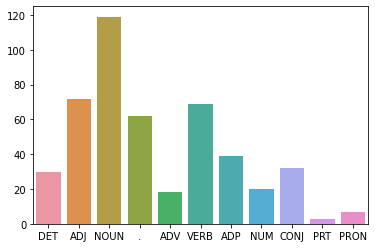

In [56]:
sns.barplot(data=pd.DataFrame(pd.Series(count_pos_tags)).T)
plt.show()

3. Modificati functia de mai sus astfel incat sa efectueze POS-tagging inainte sau dupa lematizare. Comparati diferentele. Afisati cuvintele (top 20) pentru care POS tag-ul identificat difera cel mai des intre cele doua versiuni. 

/

Modify your function such that POS-tagging is performed before or after lemmatization. Print the words in the vocabulary (top 20) for which the identified POS tag differs most often between the two versions.

Firstly, we create a POS-TAG mapper for the StanfordPOSTagger.

In [57]:
tagger=StanfordPOSTagger(model_path, jar_tagger_path)

/usr/local/lib/python3.7/dist-packages/nltk/tag/stanford.py:149: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordPOSTagger, self).__init__(*args, **kwargs)


In [58]:
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV

pos_map = {
    'NN': NOUN,
    'VB': VERB,
    'JJ': ADJ,
    'RB': ADV,
    'WR': ADV
}

In [59]:
def preprocess2(text, remove_punctuation=False, remove_stopwords=False, stemming=False, lemmatization=True, pos_tag_first=True):
  preprocessed_text = text
  # lowercasing
  preprocessed_text = preprocessed_text.lower()
  # normalize text
  preprocessed_text = unicodedata.normalize('NFKD', preprocessed_text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  # tokenize words
  tokens = nltk.word_tokenize(preprocessed_text)
  # punctuation mark removal
  if remove_punctuation:
    tokens = [token for token in tokens if token not in string.punctuation]
  # stopwords removal
  if remove_stopwords:
    tokens = [token for token in tokens if token not in stopwords.words("english")]
  # stemming (normalizing technique)
  if stemming:
    tokens = [stemmer.stem(token) for token in tokens]
  # lemmatization - reducing words to their root
  if pos_tag_first:
    pos_tags = tagger.tag(tokens)

  if lemmatization:
    if pos_tag_first:
      lemmatized_tokens = []
      for (token, tag) in pos_tags:
        if tag[:2] in pos_map.keys():
          lemmatized_tokens.append(lemmatizaer.lemmatize(token, pos=pos_map.get(tag[:2])))
        else:
          lemmatized_tokens.append(lemmatizaer.lemmatize(token))

      return tagger.tag(lemmatized_tokens)

    tokens = [lemmatizaer.lemmatize(token) for token in tokens]

  pos_tags = tagger.tag(tokens)

  return pos_tags

In [60]:
print('Lemmatization first:')
text_preprocessed = preprocess2(text, remove_punctuation=True, pos_tag_first=False)
print(text_preprocessed, '\n')

print('POS-TAGGING first:')
text_preprocessed2 = preprocess2(text, remove_punctuation=True)
print(text_preprocessed2)

Lemmatization first:
[('the', 'DT'), ('covid-19', 'NN'), ('pandemic', 'NN'), ('also', 'RB'), ('known', 'VBN'), ('a', 'DT'), ('the', 'DT'), ('coronavirus', 'NN'), ('pandemic', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('ongoing', 'JJ'), ('global', 'JJ'), ('pandemic', 'NN'), ('of', 'IN'), ('coronavirus', 'NN'), ('disease', 'NN'), ('2019', 'CD'), ('covid-19', 'NN'), ('caused', 'VBN'), ('by', 'IN'), ('severe', 'JJ'), ('acute', 'JJ'), ('respiratory', 'JJ'), ('syndrome', 'NN'), ('coronavirus', 'NN'), ('2', 'CD'), ('sars-cov-2', 'NN'), ('the', 'DT'), ('novel', 'JJ'), ('virus', 'NN'), ('wa', 'NN'), ('first', 'RB'), ('identified', 'VBN'), ('from', 'IN'), ('an', 'DT'), ('outbreak', 'NN'), ('in', 'IN'), ('the', 'DT'), ('chinese', 'JJ'), ('city', 'NN'), ('of', 'IN'), ('wuhan', 'NNP'), ('in', 'IN'), ('december', 'NNP'), ('2019', 'CD'), ('and', 'CC'), ('attempt', 'NN'), ('to', 'TO'), ('contain', 'VB'), ('it', 'PRP'), ('there', 'RB'), ('failed', 'VBD'), ('allowing', 'VBG'), ('it', 'PRP'), ('to', 'TO'), ('s

In [61]:
freq_dic = dict()

for idx, _ in enumerate(text_preprocessed):
  if text_preprocessed[idx][1] != text_preprocessed2[idx][1]:
    if text_preprocessed[idx][0] not in freq_dic:
      freq_dic[text_preprocessed[idx][0]] = 1
    else:
      freq_dic[text_preprocessed[idx][0]] += 1

counter = Counter(freq_dic)
print(counter.most_common()[:20])

[('is', 3), ('caused', 3), ('were', 3), ('infected', 2), ('are', 2), ('been', 2), ('including', 2), ('known', 1), ('wa', 1), ('identified', 1), ('failed', 1), ('allowing', 1), ('declared', 1), ('had', 1), ('making', 1), ('deadliest', 1), ('underlying', 1), ('transmits', 1), ('contaminated', 1), ('containing', 1)]


4. Gasiti bigramele de POS tags cele mai frecvente in textul analizat, si apoi in propozitiile tagged din Brown corpus.

/

Find the most frequent POS tag bigrams occurring in the analyzed text, then in the tagged sentences in the Brown corpus.

In [62]:
bigrams = dict()

for i in range(len(text_preprocessed2) - 1):
  bigram = text_preprocessed2[i][1] + ' ' + text_preprocessed2[i + 1][1] 
  if bigram not in bigrams:
    bigrams[bigram] = 1
  else:
    bigrams[bigram] +=1

bigrams = Counter(bigrams)
print(bigrams.most_common()[:-1])

[('NN NN', 39), ('JJ NN', 38), ('NN CC', 21), ('NN IN', 19), ('DT NN', 15), ('IN JJ', 15), ('NN VB', 14), ('NN VBP', 14), ('CC NN', 11), ('JJ JJ', 10), ('DT JJ', 9), ('CD NN', 9), ('VBP NN', 9), ('NN CD', 7), ('IN DT', 7), ('CC JJ', 7), ('VB DT', 6), ('IN NN', 6), ('JJ IN', 6), ('VBP DT', 5), ('NN DT', 5), ('IN CD', 5), ('NN JJ', 5), ('VB NN', 5), ('RB VB', 4), ('VB IN', 4), ('VBP JJ', 4), ('NN RB', 3), ('RB VBP', 3), ('VB RB', 3), ('IN NNP', 3), ('NNP CD', 3), ('CC DT', 3), ('DT IN', 3), ('CD CD', 3), ('JJ CC', 3), ('VBP IN', 3), ('VB JJ', 3), ('CC RB', 3), ('VB CC', 3), ('CD JJ', 3), ('CD CC', 2), ('TO VB', 2), ('VB PRP', 2), ('WP VBP', 2), ('WRB NNS', 2), ('NNS VBP', 2), ('IN VB', 2), ('MD VB', 2), ('RB IN', 2), ('RB JJ', 2), ('CC VB', 2), ('DT DT', 1), ('NNP IN', 1), ('NN TO', 1), ('PRP RB', 1), ('VBP VB', 1), ('PRP TO', 1), ('NN WP', 1), ('CD NNP', 1), ('CD DT', 1), ('NN JJR', 1), ('JJR IN', 1), ('CC CD', 1), ('VBP PRP', 1), ('PRP CD', 1), ('CD IN', 1), ('CC RBS', 1), ('RBS RB', 1

In [63]:
bigrams_brown = dict()
tagged_sent_news = nltk.corpus.brown.tagged_sents(categories='news')

for idx_text in range(len(tagged_sent_news)):
  for i in range(len(tagged_sent_news[idx_text]) - 1):
    bigram = tagged_sent_news[idx_text][i][1] + ' ' + tagged_sent_news[idx_text][i + 1][1] 
    if bigram not in bigrams_brown:
      bigrams_brown[bigram] = 1
    else:
      bigrams_brown[bigram] +=1

bigrams_brown = Counter(bigrams_brown)
print(bigrams_brown.most_common()[:-1])

[('AT NN', 3981), ('IN AT', 3966), ('NN IN', 3735), ('NP NP', 2390), ('JJ NN', 2105), ('AT JJ', 1522), ('NN .', 1509), ('NN NN', 1461), ('NNS IN', 1415), ('NN ,', 1404), ('NP ,', 1271), ('IN NN', 1202), ('IN NP', 1091), ('TO VB', 1066), ('VBN IN', 867), ('JJ NNS', 839), (', NP', 741), ('NN NNS', 688), ('IN CD', 668), ('NNS .', 641), ('NNS ,', 615), ('NN CC', 607), ('VB AT', 567), ('CD NNS', 558), ('AT NNS', 547), ('PP$ NN', 530), (', AT', 513), ('IN JJ', 512), (', CC', 505), ('IN NNS', 503), ('VBD AT', 499), ('MD VB', 485), ('NP VBD', 481), ('NN-TL NN-TL', 480), ('CS AT', 469), (', IN', 458), ('IN PP$', 454), ('AT NP', 429), ('PPS VBD', 403), ('NP-TL NN-TL', 388), ('NP .', 387), ('AT NN-TL', 381), ('NN VBD', 364), ('NNS CC', 356), ('VB IN', 350), ('RB IN', 350), ('CC NP', 347), ('VBD IN', 345), ('NP IN', 345), ('MD BE', 342), ('NN-TL NP', 327), ("'' .", 325), ('DT NN', 311), ('CC NN', 310), ('NP CC', 310), ('AP NN', 307), ('JJ-TL NN-TL', 298), ('NP NN', 297), ('IN VBG', 280), ('BE VBN'

5. Write a grammar and code to produce two trees, one for each reading of the phrase "old men and women"

In [64]:
gram = nltk.CFG.fromstring("""
  S -> NP | PP | NP PP
  PP -> P N | P NP
  NP -> N PP | ADJ NP | ADJ N
  N -> "men" | "women"
  ADJ -> "old"
  P -> "and"
""")

In [65]:
rdp = nltk.RecursiveDescentParser(gram)
rdp

In [66]:
text = "old men and women"

for tree in rdp.parse(nltk.word_tokenize(text)):
  print(tree)

(S (NP (ADJ old) (NP (N men) (PP (P and) (N women)))))
(S (NP (ADJ old) (N men)) (PP (P and) (N women)))
